# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


使用前面學到的特徵類型技巧，確認一下型別

In [4]:
dtype_df=app_train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df = dtype_df.groupby("Column Type").aggregate('count').reset_index()
dtype_df

,Column Type,Count
0,int64,41
1,float64,65
2,object,16


看來只有三種，這次將目標放在容易計算的float上面

In [5]:
float_features = []
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)

篩掉一些麻煩的數值

計算標準差，平均數，四分位數等

In [6]:
df =app_train[float_features]
df=df.loc[:,~df.isnull().any()]
df.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION
count,3.075110e+05,3.075110e+05,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,0.020868,-4986.120328
std,2.371231e+05,4.024908e+05,0.013831,3522.886321
min,2.565000e+04,4.500000e+04,0.000290,-24672.000000
25%,1.125000e+05,2.700000e+05,0.010006,-7479.500000
50%,1.471500e+05,5.135310e+05,0.018850,-4504.000000
75%,2.025000e+05,8.086500e+05,0.028663,-2010.000000
max,1.170000e+08,4.050000e+06,0.072508,0.000000


剩下四個，個別畫出直方圖

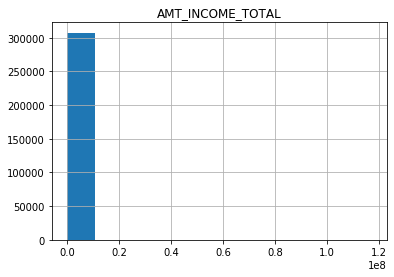

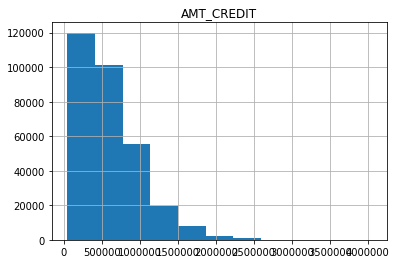

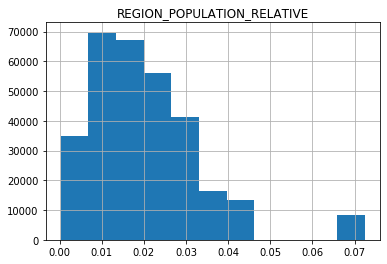

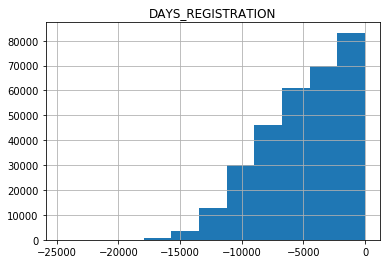

In [7]:
for col in df:
    df.loc[:,col].hist(bins=11)
    plt.title(col)
    plt.show()

特徵 REGION_POPULATION_RELATIVE 	的狀況有些特別，重點關注

In [8]:
df.loc[:,'REGION_POPULATION_RELATIVE'].mean()


0.020868112057780042

REGION_POPULATION_RELATIVE 的平均大約是 0.02 ，資料大致上是集中在此

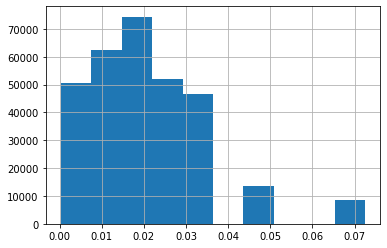

In [9]:
df.loc[:,'REGION_POPULATION_RELATIVE'].hist()
plt.show()

但是有幾個部份的資料遠離中心非常多

In [10]:
sum(df.loc[:,'REGION_POPULATION_RELATIVE']>0.06)

8412

大約佔了 8412 人，說少也不算非常少，這些資料會拉大標準差，也許是某個特殊群體，後續可以切出來分析看看